# Pool of Financial Instruments


<Economic/Financial Theory backing the selection of pools>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tickers = [
    "TATAMOTORS.NS", "ONGC.NS", "M&M.NS", "MARUTI.NS", "BPCL.NS", "RELIANCE.NS",
    "HINDPETRO.NS", "HEROMOTOCO.NS", "ESCORTS.NS", "POWERGRID.NS", "BHARATFORG.NS",
    "TORNTPOWER.NS", "CESC.NS", "TVSMOTOR.NS", "NTPC.NS", "IOC.NS",
     "TATAPOWER.NS", "BOSCHLTD.NS", "GAIL.NS", "EXIDEIND.NS",
    "MRF.NS", "NHPC.NS", "SMLISUZU.NS", "APOLLOTYRE.NS", "PETRONET.NS", "IGL.NS",
    "CEATLTD.NS", "JSWENERGY.NS"
]

start_date = "2013-01-01"
end_date = "2022-12-31"

total_data = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    data.loc[:,'Ticker'] = ticker
    data = data.loc[:,['Open', 'Close', 'Volume', 'Ticker']]
    data.loc[:,'Returns'] = data.loc[:,'Close'].pct_change()
    total_data = pd.concat([total_data, data])

# total_data.to_csv("combined_stock_data.csv")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

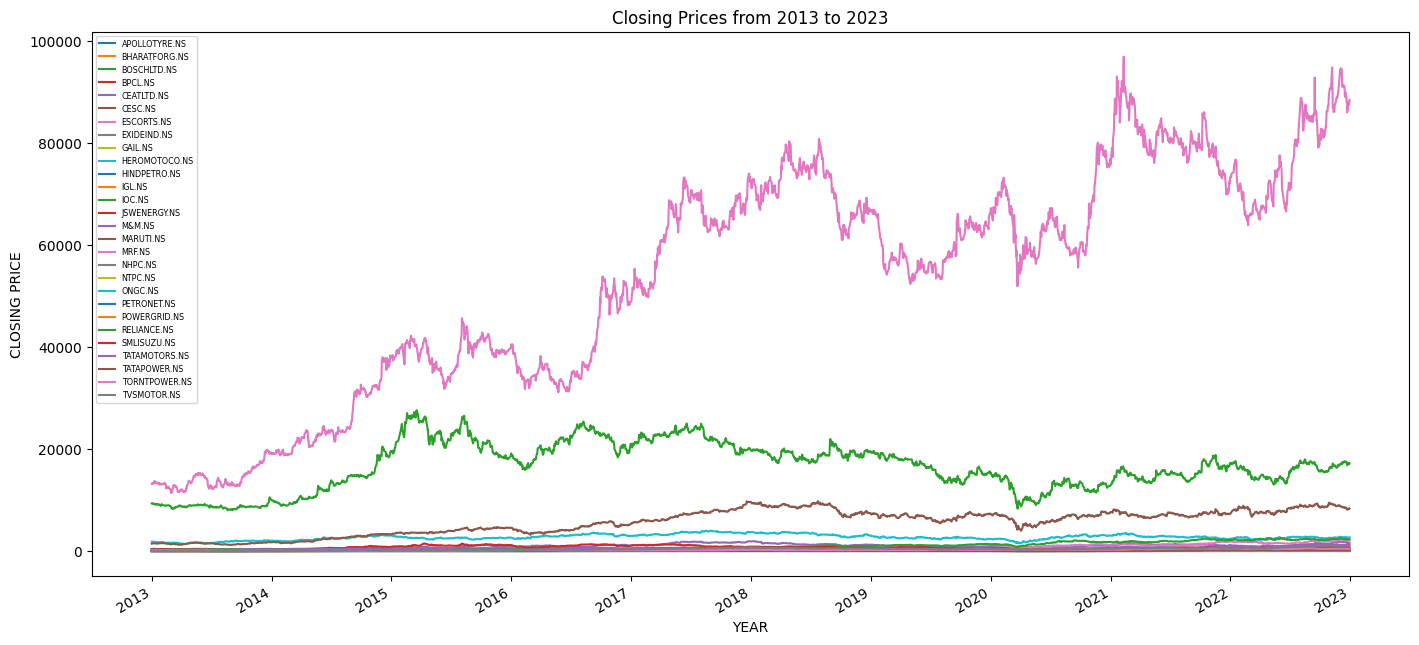

In [ ]:
closing_prices = total_data.pivot_table(index='Date', columns='Ticker', values='Close')

closing_prices.plot(figsize=(17,8))
plt.title('Closing Prices from 2013 to 2023')
plt.xlabel('YEAR')
plt.ylabel('CLOSING PRICE')
plt.legend(fontsize='xx-small')
plt.show()

<Figure size 640x480 with 0 Axes>

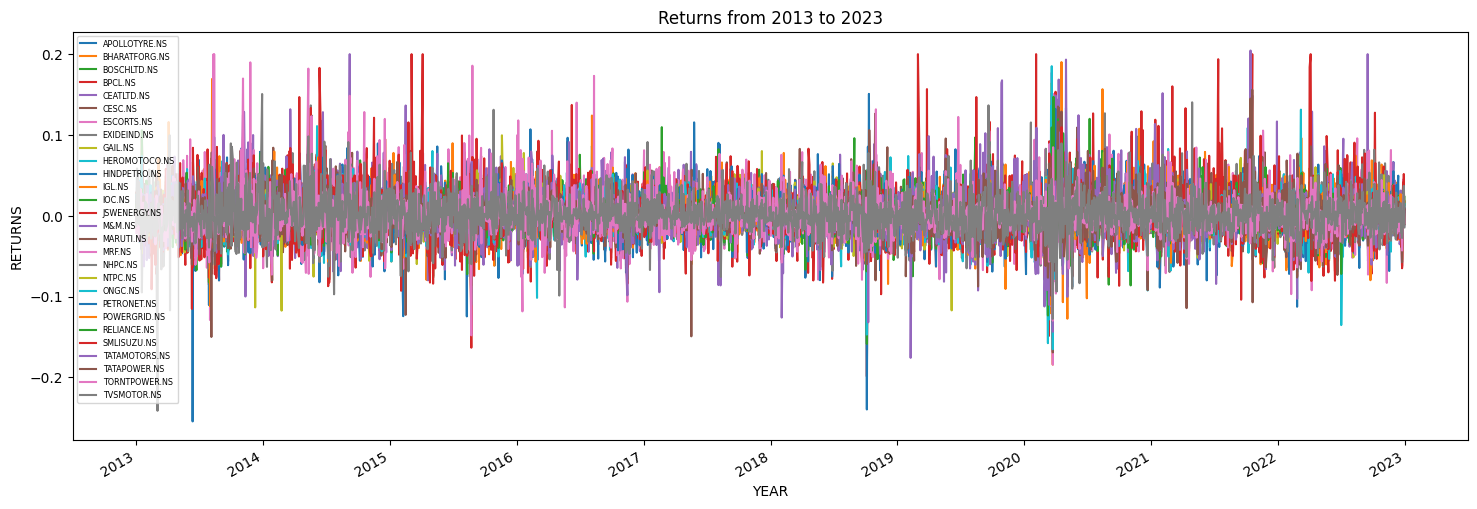

In [ ]:
returns = closing_prices.pct_change().dropna()
returns.to_csv("returns.csv")
plt.figure()
returns.plot(figsize=(18,6))
# plt.plot(returns)
plt.title('Returns from 2013 to 2023')
plt.xlabel('YEAR')
plt.ylabel('RETURNS')
plt.legend(fontsize='xx-small')
plt.show()

# Quantitatively Selecting Pairs to Trade

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(returns)
returns_scaled = scaler.transform(returns)
returns_scaled

array([[ 3.73343234e-01,  1.11827497e+00,  4.75913373e-01, ...,
         2.13261412e-01, -9.06093741e-01, -6.27196616e-01],
       [-1.45556982e-01,  1.10705557e-01, -3.96996466e-01, ...,
        -7.47909642e-01, -1.12877791e-01,  6.52301086e-01],
       [-2.58100879e-01, -4.05310090e-01, -3.78111329e-01, ...,
        -3.16199754e-03, -4.88028236e-01,  2.46316229e+00],
       ...,
       [-2.52324434e-01, -6.36183048e-04,  1.87113084e-01, ...,
         9.31175468e-02,  2.17415570e-01,  1.53418311e+00],
       [ 5.63180864e-01,  1.67905303e-01, -6.46104025e-01, ...,
        -5.28796502e-01,  5.51272914e-02,  6.63355484e-01],
       [-3.06034386e-01,  4.59719641e-02,  5.30310845e-01, ...,
         3.71281830e-01, -3.93641255e-01, -6.81659007e-01]])

x= x-X.mean()/X.std()

In [ ]:
num_components = 10
columns=[f'PC{n+1}' for n in range(num_components)]
pca = PCA(num_components)
pca_result_scaled = pca.fit_transform(returns_scaled.T)
pca_df_scaled = pd.DataFrame(pca_result_scaled, columns=columns, index=returns.columns)

In [ ]:
pca_df_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Ticker,,,,,,,,,,
APOLLOTYRE.NS,-11.760547,-6.132049,14.095969,-0.962951,-14.388626,4.203993,-7.435595,-0.468634,-6.059087,3.226969
BHARATFORG.NS,-9.947749,-4.833965,-4.490829,-6.757665,-0.163143,-0.070809,-7.613453,-12.746609,-11.664629,3.322551
BOSCHLTD.NS,-12.139227,-3.008861,-7.671863,-2.884032,-4.113344,-8.729016,7.050290,-0.897411,-10.267429,3.643771
BPCL.NS,25.917918,-17.747910,2.226810,-2.908039,2.019355,3.122610,5.589362,-0.096032,0.769727,3.161637
CEATLTD.NS,-7.978410,-7.694827,26.401754,1.853700,-14.723562,5.037964,-0.856262,-0.843281,1.787072,-8.890630
CESC.NS,2.410982,8.160614,2.458201,-16.469308,5.756715,1.016216,-5.024033,-0.539746,-4.838475,14.370287
ESCORTS.NS,-6.886041,-3.821814,7.166475,3.178230,8.559692,-1.620731,3.421283,11.519832,21.426556,6.214047
EXIDEIND.NS,-8.760632,0.523951,2.414977,2.357434,2.523556,0.435409,-1.642498,6.219525,0.486731,18.944739
GAIL.NS,14.171806,7.665702,-3.979985,10.691592,-7.790761,-15.601904,-6.619205,-5.984044,-3.645608,3.962091


Text(0.5, 1.0, 'PCA Scatter Plot with Annotations')

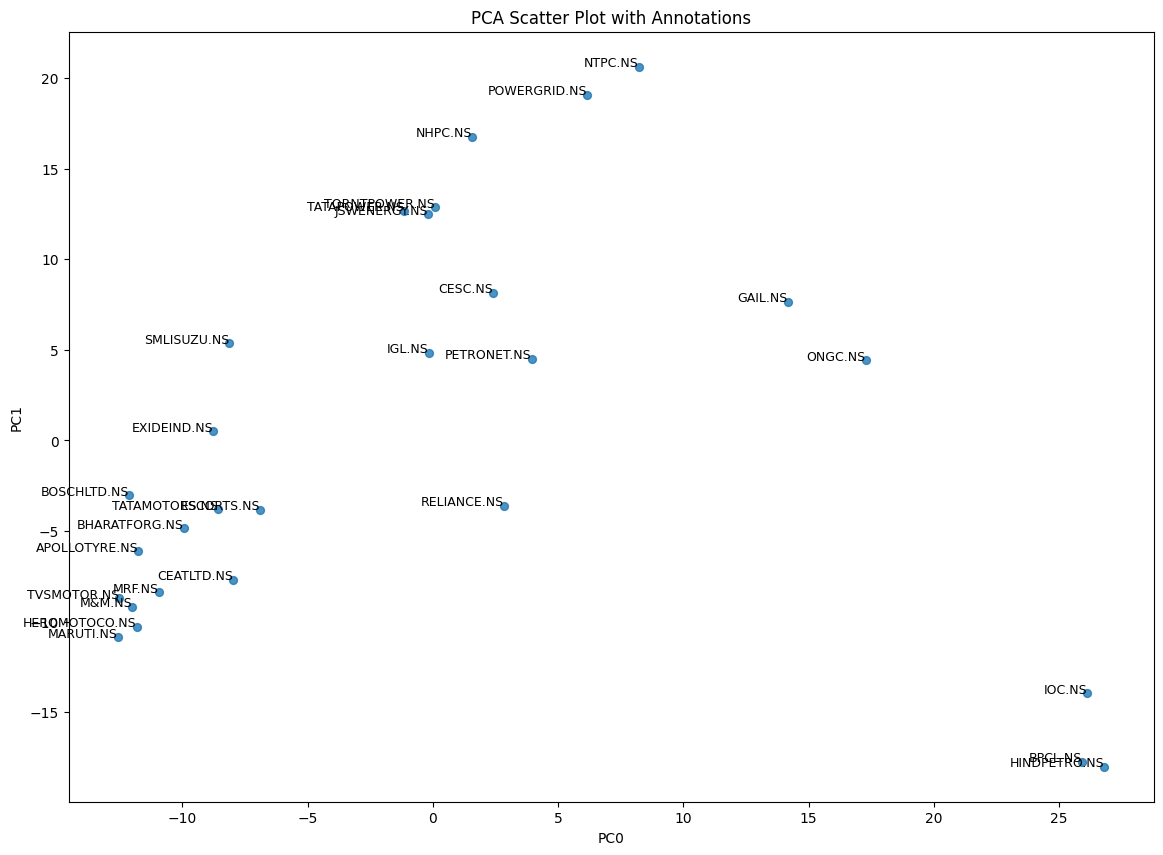

In [ ]:
pca_df_scaled.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8,figsize=(14,10))
for label, x, y in zip(pca_df_scaled.index, pca_df_scaled['PC1'], pca_df_scaled['PC2']):
    plt.text(x, y, label, fontsize=9, ha='right')
plt.gca().spines[['top', 'right',]].set_visible(True)
plt.xlabel('PC0')
plt.ylabel('PC1')
plt.title('PCA Scatter Plot with Annotations')

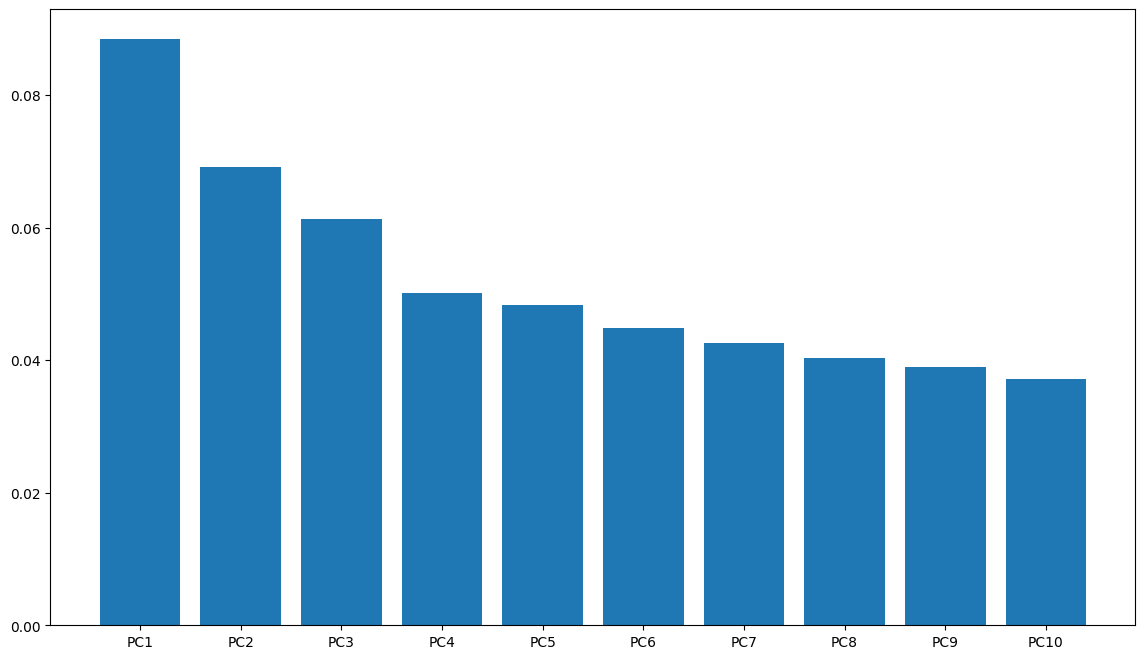

In [ ]:
fig,ax = plt.subplots(figsize=(14,8))

ax.bar(columns,pca.explained_variance_ratio_)
plt.show()

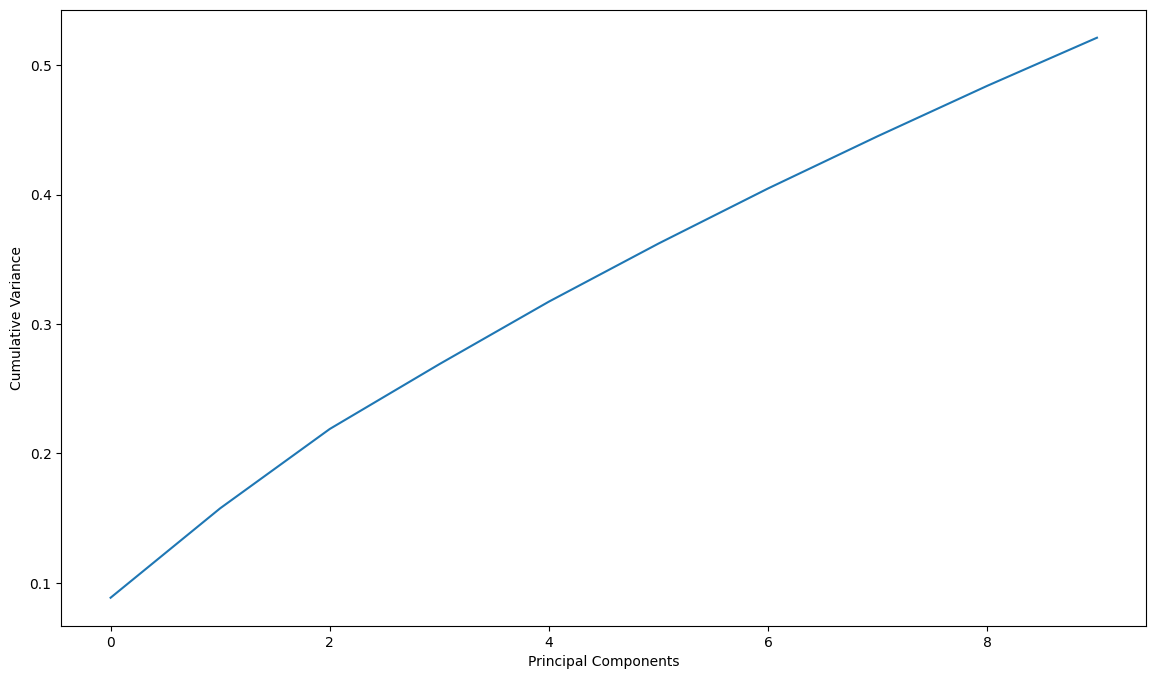

In [ ]:
cum_variance = [0]*len(columns)
cum_variance[0] = pca.explained_variance_ratio_[0]
for i in range(1,len(columns)):
  cum_variance[i] = cum_variance[i-1] + pca.explained_variance_ratio_[i]

fig,ax = plt.subplots(figsize=(14,8))

plt.xlabel('Principal Components')
plt.ylabel('Cumulative Variance')
ax.plot(cum_variance)
plt.show()

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

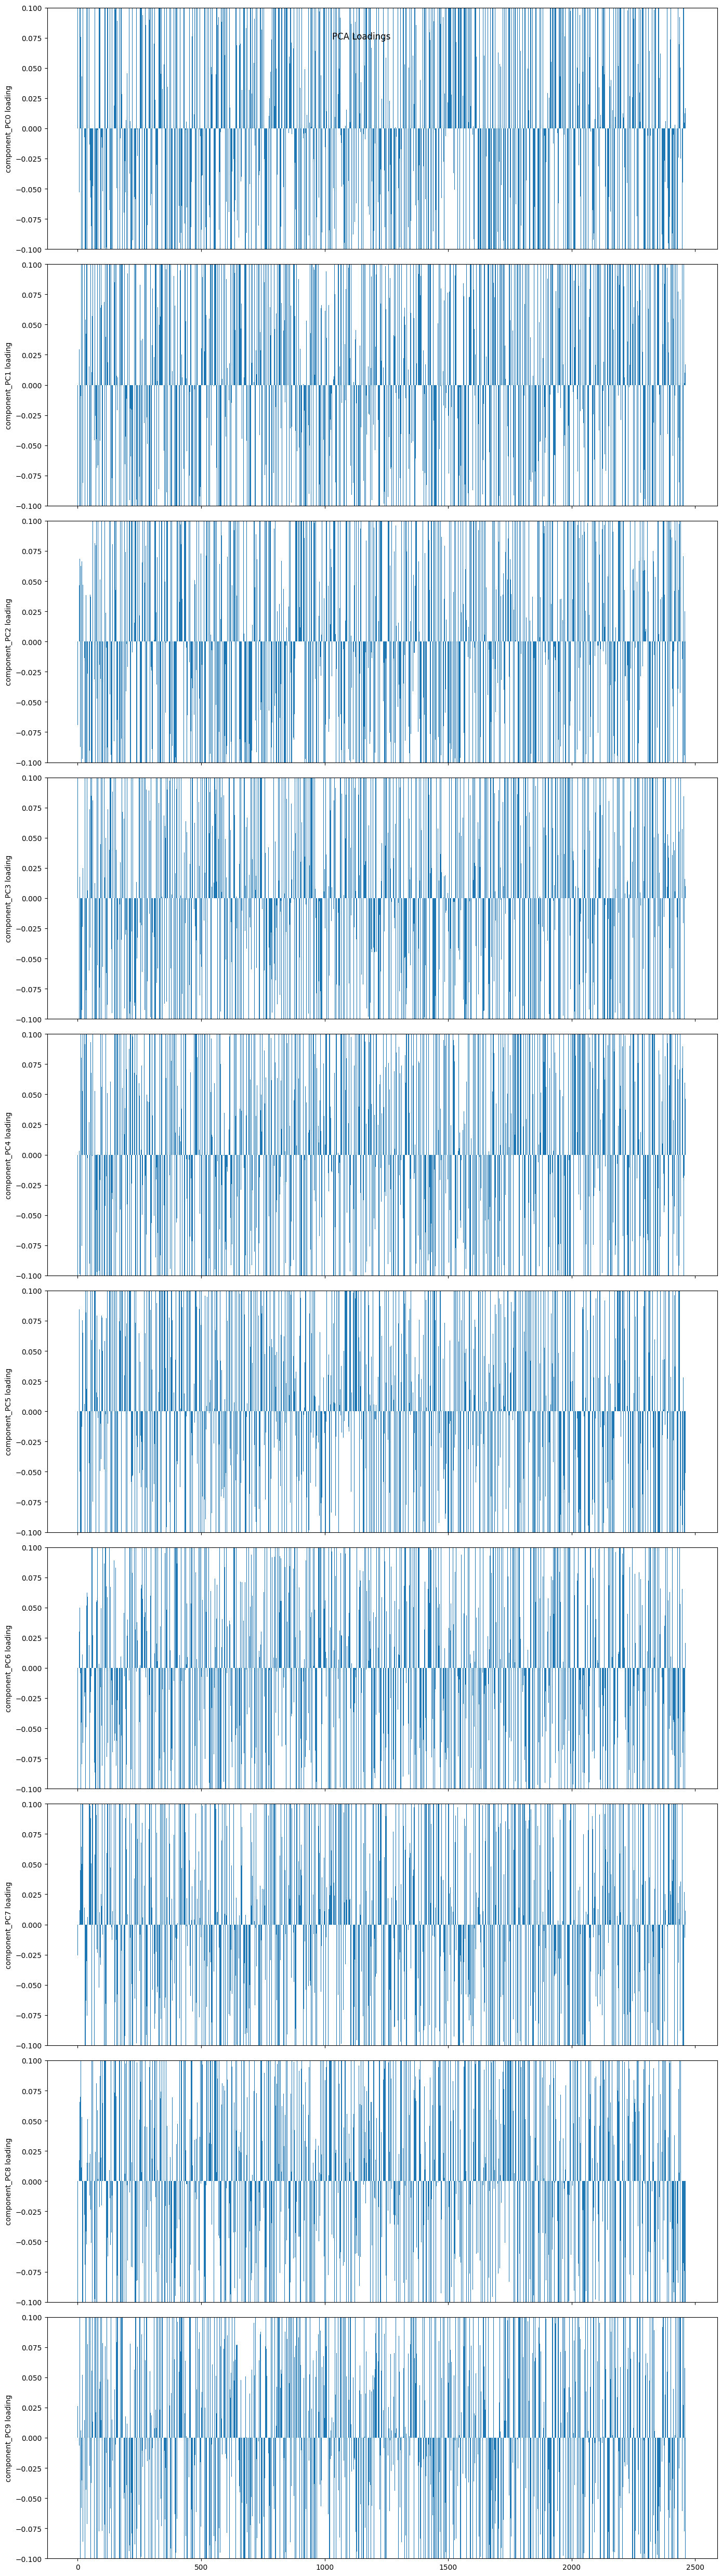

In [ ]:
components = [f'PC{x}' for x in range(num_components)]
fig, axes = plt.subplots(nrows=num_components,ncols=1,figsize=(14,50),sharex=True)

for i, ax in enumerate(axes):
    ax.bar(range(loadings.shape[0]), loadings[:,i])
    ax.set_ylabel(f'component_{components[i]} loading')
    ax.set_ylim([-0.1, 0.1])

plt.suptitle('PCA Loadings')
plt.tight_layout()
plt.show()

## OPTICS CLUSTERRING

In [ ]:
from sklearn.cluster import OPTICS
clusterring = OPTICS(min_samples=2,xi=0.05,min_cluster_size=2).fit(pca_df_scaled.iloc[:,0:7]) #to reduce correlation
clusterring.labels_

array([ 0, -1,  2,  8,  0,  4,  1,  1,  5,  3,  8,  7,  8,  4, -1,  3,  0,
        4,  6,  5,  7,  6,  5, -1,  2,  4,  4, -1])

In [ ]:
labels = clusterring.labels_[clusterring.ordering_]
reachability = clusterring.reachability_[clusterring.ordering_]

In [ ]:
labels

array([ 0,  0,  0,  1,  1, -1,  2,  2, -1,  3,  3, -1,  4,  4,  4,  4,  4,
        5,  5,  5,  6,  6,  7,  7, -1,  8,  8,  8])

In [ ]:
num_stocks = []
for i in range(max(clusterring.labels_)+1):
  num_stocks.append(pca_df_scaled[clusterring.labels_==i].shape[0])

num_stocks

[3, 2, 2, 2, 5, 3, 2, 2, 3]

In [ ]:
pca_df_scaled[clusterring.labels_==-1].shape[0]

4

Text(0.5, 1.0, 'Reachability Plot')

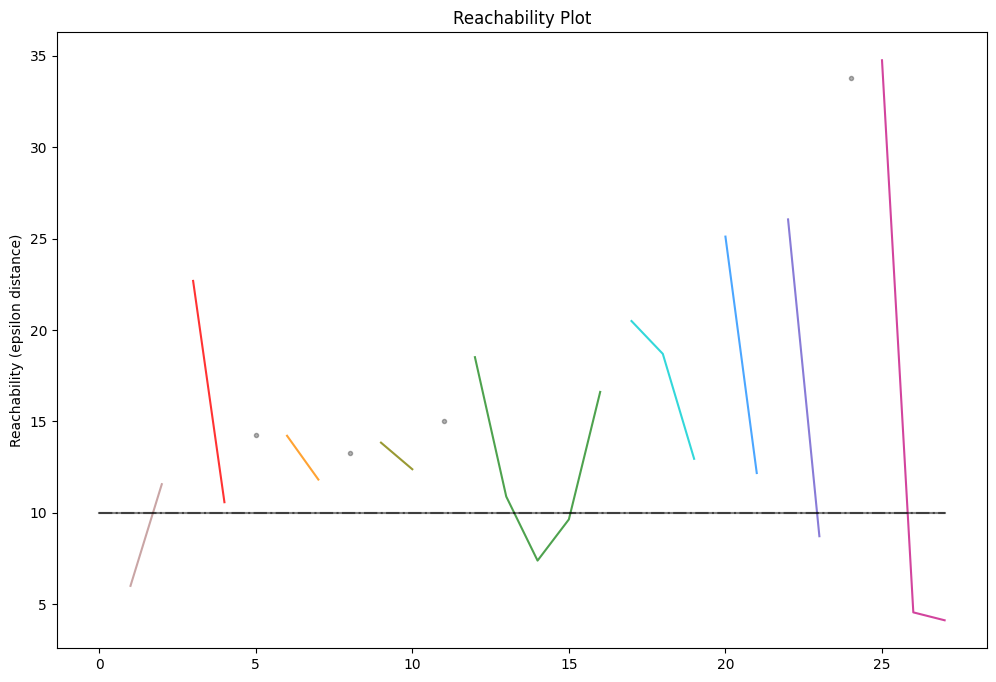

In [ ]:
space = np.arange(len(pca_df_scaled))
fig, ax = plt.subplots(figsize=(12,8))
colors = ["rosybrown","red","darkorange","olive","forestgreen","darkturquoise","dodgerblue","slateblue","mediumvioletred"]
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax.plot(Xk, Rk, color, alpha=0.8)
ax.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax.plot(space, np.full_like(space, 10, dtype=float), "k-", alpha=0.5)
ax.plot(space, np.full_like(space, 10, dtype=float), "k-.", alpha=0.5)
ax.set_ylabel("Reachability (epsilon distance)")
ax.set_title("Reachability Plot")

Text(0.5, 1.0, 'Automatic Clustering\nOPTICS')

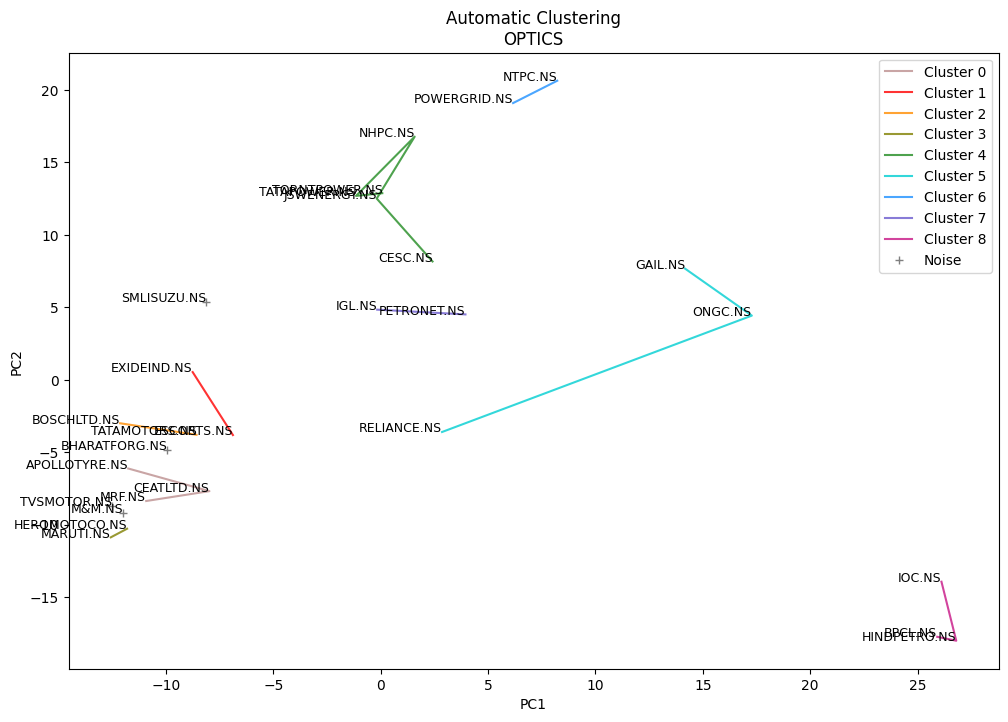

In [ ]:
from random import randint
fig, ax = plt.subplots(figsize=(12,8))
# for i in range(max(clusterring.labels_)):
#     colors.append('#%06X' % randint(0, 0xFFFFFF))

for klass, color in enumerate(colors):
    pck = pca_df_scaled[clusterring.labels_ == klass]
    ax.plot(pck.iloc[:, 0], pck.iloc[:, 1], color, alpha=0.8,label=f'Cluster {klass}')
    for index, row in pck.iterrows():
        ax.text(row.iloc[0], row.iloc[1], str(index), fontsize=9, ha='right')

ax.plot(pca_df_scaled[clusterring.labels_ == -1].iloc[:,0], pca_df_scaled[clusterring.labels_ == -1].iloc[:,1], "k+", alpha=0.5,label=f'Noise')
for index, row in pca_df_scaled[clusterring.labels_ == -1].iterrows():
  ax.text(row.iloc[0], row.iloc[1], str(index), fontsize=9, ha='right')
ax.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
ax.set_title("Automatic Clustering\nOPTICS")

In [ ]:
for i in range(max(clusterring.labels_)+1):
  print(f'Cluster {i}: {pca_df_scaled[clusterring.labels_==i]}')

Cluster 0:                      PC1       PC2        PC3       PC4        PC5       PC6  \
Ticker                                                                         
APOLLOTYRE.NS -11.760547 -6.132049  14.095969 -0.962951 -14.388626  4.203993   
CEATLTD.NS     -7.978410 -7.694827  26.401754  1.853700 -14.723562  5.037964   
MRF.NS        -10.923879 -8.375243  17.126247  1.653113 -11.324542  2.941159   

                    PC7       PC8       PC9      PC10  
Ticker                                                 
APOLLOTYRE.NS -7.435595 -0.468634 -6.059087  3.226969  
CEATLTD.NS    -0.856262 -0.843281  1.787072 -8.890630  
MRF.NS        -5.614524  6.760384 -2.578451 -2.361315  
Cluster 1:                   PC1       PC2       PC3       PC4       PC5       PC6  \
Ticker                                                                    
ESCORTS.NS  -6.886041 -3.821814  7.166475  3.178230  8.559692 -1.620731   
EXIDEIND.NS -8.760632  0.523951  2.414977  2.357434  2.523556  0.435409 

## Exit Tests

In [ ]:
pairs = []

for i in range(max(clusterring.labels_)+1):
  for j in range(0,pca_df_scaled[clusterring.labels_==i].shape[0]-1,1):
    for k in range(j+1,pca_df_scaled[clusterring.labels_==i].shape[0],1):
      pairs.append([pca_df_scaled[clusterring.labels_==i].index[j],pca_df_scaled[clusterring.labels_==i].index[k]])
pairs


[['APOLLOTYRE.NS', 'CEATLTD.NS'],
 ['APOLLOTYRE.NS', 'MRF.NS'],
 ['CEATLTD.NS', 'MRF.NS'],
 ['ESCORTS.NS', 'EXIDEIND.NS'],
 ['BOSCHLTD.NS', 'TATAMOTORS.NS'],
 ['HEROMOTOCO.NS', 'MARUTI.NS'],
 ['CESC.NS', 'JSWENERGY.NS'],
 ['CESC.NS', 'NHPC.NS'],
 ['CESC.NS', 'TATAPOWER.NS'],
 ['CESC.NS', 'TORNTPOWER.NS'],
 ['JSWENERGY.NS', 'NHPC.NS'],
 ['JSWENERGY.NS', 'TATAPOWER.NS'],
 ['JSWENERGY.NS', 'TORNTPOWER.NS'],
 ['NHPC.NS', 'TATAPOWER.NS'],
 ['NHPC.NS', 'TORNTPOWER.NS'],
 ['TATAPOWER.NS', 'TORNTPOWER.NS'],
 ['GAIL.NS', 'ONGC.NS'],
 ['GAIL.NS', 'RELIANCE.NS'],
 ['ONGC.NS', 'RELIANCE.NS'],
 ['NTPC.NS', 'POWERGRID.NS'],
 ['IGL.NS', 'PETRONET.NS'],
 ['BPCL.NS', 'HINDPETRO.NS'],
 ['BPCL.NS', 'IOC.NS'],
 ['HINDPETRO.NS', 'IOC.NS']]

In [ ]:
#!pip install arch

In [ ]:
closing_prices.columns

Index(['APOLLOTYRE.NS', 'BHARATFORG.NS', 'BOSCHLTD.NS', 'BPCL.NS',
       'CEATLTD.NS', 'CESC.NS', 'ESCORTS.NS', 'EXIDEIND.NS', 'GAIL.NS',
       'HEROMOTOCO.NS', 'HINDPETRO.NS', 'IGL.NS', 'IOC.NS', 'JSWENERGY.NS',
       'M&M.NS', 'MARUTI.NS', 'MRF.NS', 'NHPC.NS', 'NTPC.NS', 'ONGC.NS',
       'PETRONET.NS', 'POWERGRID.NS', 'RELIANCE.NS', 'SMLISUZU.NS',
       'TATAMOTORS.NS', 'TATAPOWER.NS', 'TORNTPOWER.NS', 'TVSMOTOR.NS'],
      dtype='object', name='Ticker')

In [ ]:
closing_prices

Ticker,APOLLOTYRE.NS,BHARATFORG.NS,BOSCHLTD.NS,BPCL.NS,CEATLTD.NS,CESC.NS,ESCORTS.NS,EXIDEIND.NS,GAIL.NS,HEROMOTOCO.NS,...,NTPC.NS,ONGC.NS,PETRONET.NS,POWERGRID.NS,RELIANCE.NS,SMLISUZU.NS,TATAMOTORS.NS,TATAPOWER.NS,TORNTPOWER.NS,TVSMOTOR.NS
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,89.400002,128.449997,9387.799805,59.383331,107.050003,28.750233,73.650002,143.199997,67.012535,1897.349976,...,129.583328,178.433334,79.000000,64.040642,384.339752,448.899994,313.388580,107.502914,195.449997,42.599998
2013-01-02,90.300003,131.899994,9475.549805,61.075001,109.550003,28.790630,73.050003,142.300003,68.390656,1905.349976,...,131.250000,183.066666,80.250000,63.618767,387.654205,446.350006,314.625336,108.081924,191.250000,42.049999
2013-01-03,90.050003,132.375000,9409.000000,61.041664,111.050003,28.440512,73.199997,142.850006,68.128159,1887.949951,...,131.291672,186.533340,80.599998,64.209389,393.505951,445.049988,314.724274,106.296638,190.850006,42.750000
2013-01-04,89.550003,131.274994,9346.250000,62.333332,111.150002,28.229542,75.500000,142.350006,69.590660,1887.949951,...,132.416672,189.866669,81.574997,64.659393,394.008820,460.500000,312.052917,106.344894,188.699997,45.250000
2013-01-07,88.150002,131.199997,9329.099609,64.250000,111.599998,28.009596,75.449997,146.250000,68.690659,1897.300049,...,131.333328,192.000000,83.000000,64.350014,391.608704,470.149994,309.925751,104.993866,185.300003,47.349998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,320.350006,875.799988,17281.150391,162.550003,1600.900024,76.900002,2102.199951,180.699997,94.400002,2686.300049,...,165.649994,141.300003,209.850006,158.887497,2329.697266,638.849976,384.799988,203.149994,489.850006,1015.549988
2022-12-27,323.500000,872.799988,17221.550781,163.000000,1660.650024,77.050003,2086.800049,177.949997,95.000000,2702.350098,...,165.199997,144.800003,211.899994,159.487503,2348.757324,665.200012,394.149994,207.699997,492.850006,1044.050049
2022-12-28,321.750000,873.700012,17289.250000,162.050003,1638.400024,77.099998,2112.199951,177.899994,95.800003,2696.600098,...,165.850006,143.899994,212.550003,161.812500,2348.526611,674.250000,391.299988,208.250000,495.799988,1082.699951


In [ ]:
!pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 7.3 MB/s eta 0:00:00


In [ ]:
from arch.unitroot import engle_granger
engle_granger(closing_prices[pairs[14][0]],closing_prices[pairs[14][1]]).summary()

Test Statistic,-2.717
P-value,0.194
ADF Lag length,0
Estimated Root ρ (γ+1),0.993


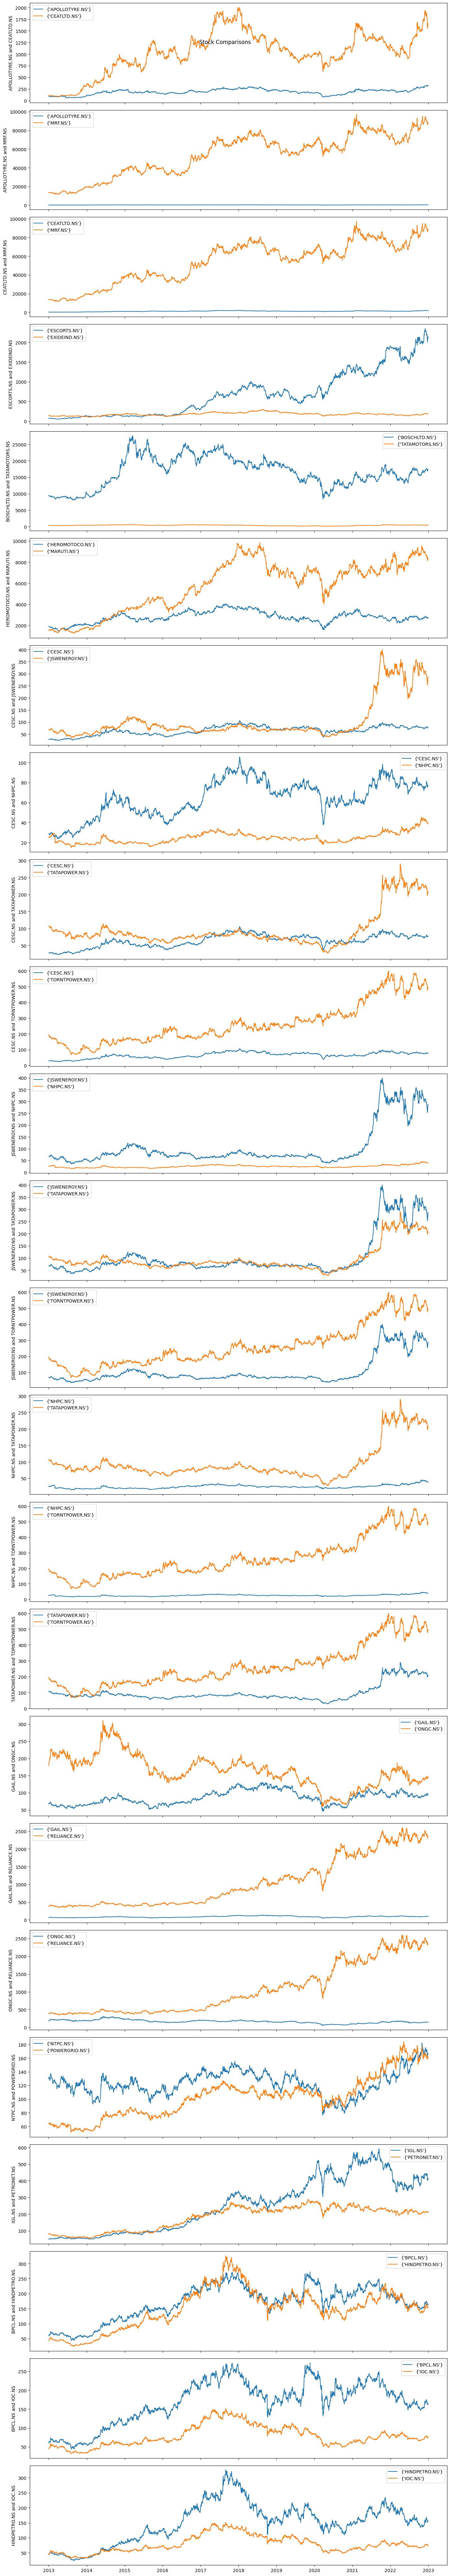

In [ ]:
components = [f'{pair[0]} and {pair[1]}' for pair in pairs]
fig, axes = plt.subplots(nrows=len(pairs),ncols=1,figsize=(14,80),sharex=True)

for i, ax in enumerate(axes):
    ax.plot(closing_prices[pairs[i][0]],label={pairs[i][0]})
    ax.plot(closing_prices[pairs[i][1]],label={pairs[i][1]})
    ax.legend()
    ax.set_ylabel(f'{components[i]}')

plt.suptitle('Stock Comparisons')
plt.tight_layout()
plt.show()

In [ ]:
coint_p = []
from statsmodels.tsa.stattools import coint
for pair in pairs:
  coint_p.append([coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='c')[1],
                  coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='ct')[1],
                  coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='n')[1],
                  coint(closing_prices[pair[0]],closing_prices[pair[1]],trend='ctt')[1]
                  ])
coint_p

[[0.16347014878601873,
  0.4473693239193386,
  0.06945874817539781,
  0.3656090514707639],
 [0.5013920821702613,
  0.670156604303611,
  0.36048598796020015,
  0.7837506723888488],
 [0.34754777609117127,
  0.09904592567700965,
  0.16905178862243447,
  0.4361775659217427],
 [0.9939327390610545,
  0.6733657745315222,
  0.9828454170315402,
  0.3411715443417863],
 [0.4466952789723303,
  0.7574544657727063,
  0.3522100980185297,
  0.38936185541927415],
 [0.41572608935043587,
  0.25293033426154937,
  0.5044197619279437,
  0.44572091965496186],
 [0.33533248991806497,
  0.6932453730966263,
  0.7212875222014103,
  0.35906100862096535],
 [0.12304346235487923,
  0.5306973521863341,
  0.03200097816176681,
  0.30065756489062245],
 [0.4117639327585373,
  0.6898968240848865,
  0.5972334871003278,
  0.5286404682896665],
 [0.38555931394483056,
  0.6436268984422223,
  0.5128978259316606,
  0.7226436737734018],
 [0.3934333183956544,
  0.7267683046378102,
  0.49912693649269935,
  0.4823090566310979],
 [0.0

In [ ]:
exit_res = pd.DataFrame()
for c,pair in zip(coint_p,pairs):
  exit_res[f'{pair[0]}-{pair[1]}'] = c
exit_res = exit_res.T
exit_res

,0,1,2,3
APOLLOTYRE.NS-CEATLTD.NS,0.163470,0.447369,0.069459,0.365609
APOLLOTYRE.NS-MRF.NS,0.501392,0.670157,0.360486,0.783751
CEATLTD.NS-MRF.NS,0.347548,0.099046,0.169052,0.436178
ESCORTS.NS-EXIDEIND.NS,0.993933,0.673366,0.982845,0.341172
BOSCHLTD.NS-TATAMOTORS.NS,0.446695,0.757454,0.352210,0.389362
HEROMOTOCO.NS-MARUTI.NS,0.415726,0.252930,0.504420,0.445721
CESC.NS-JSWENERGY.NS,0.335332,0.693245,0.721288,0.359061
CESC.NS-NHPC.NS,0.123043,0.530697,0.032001,0.300658
CESC.NS-TATAPOWER.NS,0.411764,0.689897,0.597233,0.528640
CESC.NS-TORNTPOWER.NS,0.385559,0.643627,0.512898,0.722644


In [ ]:
mux = pd.MultiIndex.from_product([['Cointegration P-values'], ['c','ct','n','ctt']])
exit_res.columns = mux
exit_res

Cointegration P-values                      \
                                                c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                 0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                     0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                        0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                   0.993933  0.673366  0.982845   
BOSCHLTD.NS-TATAMOTORS.NS                0.446695  0.757454  0.352210   
HEROMOTOCO.NS-MARUTI.NS                  0.415726  0.252930  0.504420   
CESC.NS-JSWENERGY.NS                     0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                          0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                     0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                    0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                     0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS               0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                     0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                    0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS               0.716647  0.216959  0.337934   
GAIL.NS-ONGC.NS                          0.409194  0.756027  0.635680   
GAIL.NS-RELIANCE.NS                      0.364808  0.366111  0.764139   
ONGC.NS-RELIANCE.NS                      0.276491  0.712753  0.658989   
NTPC.NS-POWERGRID.NS                     0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                       0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                     0.079676  0.173809  0.115777   
BPCL.NS-IOC.NS                           0.400562  0.466276  0.274210   
HINDPETRO.NS-IOC.NS                      0.439103  0.285866  0.169889   

                                      
                                 ctt  
APOLLOTYRE.NS-CEATLTD.NS    0.365609  
APOLLOTYRE.NS-MRF.NS        0.783751  
CEATLTD.NS-MRF.NS           0.436178  
ESCORTS.NS-EXIDEIND.NS      0.341172  
BOSCHLTD.NS-TATAMOTORS.NS   0.389362  
HEROMOTOCO.NS-MARUTI.NS     0.445721  
CESC.NS-JSWENERGY.NS        0.359061  
CESC.NS-NHPC.NS             0.300658  
CESC.NS-TATAPOWER.NS        0.528640  
CESC.NS-TORNTPOWER.NS       0.722644  
JSWENERGY.NS-NHPC.NS        0.482309  
JSWENERGY.NS-TATAPOWER.NS   0.045916  
JSWENERGY.NS-TORNTPOWER.NS  0.040493  
NHPC.NS-TATAPOWER.NS        0.474353  
NHPC.NS-TORNTPOWER.NS       0.868444  
TATAPOWER.NS-TORNTPOWER.NS  0.540192  
GAIL.NS-ONGC.NS             0.299119  
GAIL.NS-RELIANCE.NS         0.819200  
ONGC.NS-RELIANCE.NS         0.842868  
NTPC.NS-POWERGRID.NS        0.009171  
IGL.NS-PETRONET.NS          0.745591  
BPCL.NS-HINDPETRO.NS        0.075712  
BPCL.NS-IOC.NS              0.253821  
HINDPETRO.NS-IOC.NS         0.418366

In [ ]:
exit_res.loc[:,'Coint Passed'] = ~ ((exit_res['Cointegration P-values'].loc[:,'c']>0.1) &
                                                 (exit_res['Cointegration P-values'].loc[:,'ct']>0.1) &
                                                 (exit_res['Cointegration P-values'].loc[:,'n']>0.1) &
                                                 (exit_res['Cointegration P-values'].loc[:,'ctt']>0.1))

In [ ]:
exit_res

Cointegration P-values                      \
                                                c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                 0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                     0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                        0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                   0.993933  0.673366  0.982845   
BOSCHLTD.NS-TATAMOTORS.NS                0.446695  0.757454  0.352210   
HEROMOTOCO.NS-MARUTI.NS                  0.415726  0.252930  0.504420   
CESC.NS-JSWENERGY.NS                     0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                          0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                     0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                    0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                     0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS               0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                     0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                    0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS               0.716647  0.216959  0.337934   
GAIL.NS-ONGC.NS                          0.409194  0.756027  0.635680   
GAIL.NS-RELIANCE.NS                      0.364808  0.366111  0.764139   
ONGC.NS-RELIANCE.NS                      0.276491  0.712753  0.658989   
NTPC.NS-POWERGRID.NS                     0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                       0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                     0.079676  0.173809  0.115777   
BPCL.NS-IOC.NS                           0.400562  0.466276  0.274210   
HINDPETRO.NS-IOC.NS                      0.439103  0.285866  0.169889   

                                     Coint Passed  
                                 ctt               
APOLLOTYRE.NS-CEATLTD.NS    0.365609         True  
APOLLOTYRE.NS-MRF.NS        0.783751        False  
CEATLTD.NS-MRF.NS           0.436178         True  
ESCORTS.NS-EXIDEIND.NS      0.341172        False  
BOSCHLTD.NS-TATAMOTORS.NS   0.389362        False  
HEROMOTOCO.NS-MARUTI.NS     0.445721        False  
CESC.NS-JSWENERGY.NS        0.359061        False  
CESC.NS-NHPC.NS             0.300658         True  
CESC.NS-TATAPOWER.NS        0.528640        False  
CESC.NS-TORNTPOWER.NS       0.722644        False  
JSWENERGY.NS-NHPC.NS        0.482309        False  
JSWENERGY.NS-TATAPOWER.NS   0.045916         True  
JSWENERGY.NS-TORNTPOWER.NS  0.040493         True  
NHPC.NS-TATAPOWER.NS        0.474353        False  
NHPC.NS-TORNTPOWER.NS       0.868444        False  
TATAPOWER.NS-TORNTPOWER.NS  0.540192        False  
GAIL.NS-ONGC.NS             0.299119        False  
GAIL.NS-RELIANCE.NS         0.819200        False  
ONGC.NS-RELIANCE.NS         0.842868        False  
NTPC.NS-POWERGRID.NS        0.009171         True  
IGL.NS-PETRONET.NS          0.745591        False  
BPCL.NS-HINDPETRO.NS        0.075712         True  
BPCL.NS-IOC.NS              0.253821        False  
HINDPETRO.NS-IOC.NS         0.418366        False

In [ ]:
!pip install hurst

In [ ]:
exit_res['Coint Passed']

APOLLOTYRE.NS-CEATLTD.NS       True
APOLLOTYRE.NS-MRF.NS          False
CEATLTD.NS-MRF.NS              True
ESCORTS.NS-EXIDEIND.NS        False
BOSCHLTD.NS-TATAMOTORS.NS     False
HEROMOTOCO.NS-MARUTI.NS       False
CESC.NS-JSWENERGY.NS          False
CESC.NS-NHPC.NS                True
CESC.NS-TATAPOWER.NS          False
CESC.NS-TORNTPOWER.NS         False
JSWENERGY.NS-NHPC.NS          False
JSWENERGY.NS-TATAPOWER.NS      True
JSWENERGY.NS-TORNTPOWER.NS     True
NHPC.NS-TATAPOWER.NS          False
NHPC.NS-TORNTPOWER.NS         False
TATAPOWER.NS-TORNTPOWER.NS    False
GAIL.NS-ONGC.NS               False
GAIL.NS-RELIANCE.NS           False
ONGC.NS-RELIANCE.NS           False
NTPC.NS-POWERGRID.NS           True
IGL.NS-PETRONET.NS            False
BPCL.NS-HINDPETRO.NS           True
BPCL.NS-IOC.NS                False
HINDPETRO.NS-IOC.NS           False
Name: Coint Passed, dtype: bool

In [ ]:
from hurst import compute_Hc, random_walk
hurst = [np.inf]*len(exit_res)
for i in range(len(pairs)):
  if exit_res['Coint Passed'][i] == True:
    hurst[i] = compute_Hc(closing_prices[pairs[i][0]]-closing_prices[pairs[i][1]])[0]

exit_res['Hurst exponent'] = hurst


In [ ]:
from hurst import compute_Hc, random_walk
scaled_hurst = [np.inf]*len(exit_res)
basic_hedge_ratio = [0]*len(exit_res)
for i in range(len(pairs)):
  if exit_res['Coint Passed'][i] == True:
    scaled_hurst[i] = compute_Hc((closing_prices[pairs[i][1]].mean())*(closing_prices[pairs[i][0]])-(closing_prices[pairs[i][0]].mean())*(closing_prices[pairs[i][1]]))[0]
    basic_hedge_ratio[i] = (closing_prices[pairs[i][0]].mean())/(closing_prices[pairs[i][1]].mean())

exit_res['Basic Hedge Ratio'] =basic_hedge_ratio
exit_res['Scaled Hurst Exponent'] = scaled_hurst
exit_res

Cointegration P-values                      \
                                                c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                 0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                     0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                        0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                   0.993933  0.673366  0.982845   
BOSCHLTD.NS-TATAMOTORS.NS                0.446695  0.757454  0.352210   
HEROMOTOCO.NS-MARUTI.NS                  0.415726  0.252930  0.504420   
CESC.NS-JSWENERGY.NS                     0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                          0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                     0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                    0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                     0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS               0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                     0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                    0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS               0.716647  0.216959  0.337934   
GAIL.NS-ONGC.NS                          0.409194  0.756027  0.635680   
GAIL.NS-RELIANCE.NS                      0.364808  0.366111  0.764139   
ONGC.NS-RELIANCE.NS                      0.276491  0.712753  0.658989   
NTPC.NS-POWERGRID.NS                     0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                       0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                     0.079676  0.173809  0.115777   
BPCL.NS-IOC.NS                           0.400562  0.466276  0.274210   
HINDPETRO.NS-IOC.NS                      0.439103  0.285866  0.169889   

                                     Coint Passed Hurst exponent  \
                                 ctt                               
APOLLOTYRE.NS-CEATLTD.NS    0.365609         True       0.545269   
APOLLOTYRE.NS-MRF.NS        0.783751        False            inf   
CEATLTD.NS-MRF.NS           0.436178         True       0.570671   
ESCORTS.NS-EXIDEIND.NS      0.341172        False            inf   
BOSCHLTD.NS-TATAMOTORS.NS   0.389362        False            inf   
HEROMOTOCO.NS-MARUTI.NS     0.445721        False            inf   
CESC.NS-JSWENERGY.NS        0.359061        False            inf   
CESC.NS-NHPC.NS             0.300658         True       0.523074   
CESC.NS-TATAPOWER.NS        0.528640        False            inf   
CESC.NS-TORNTPOWER.NS       0.722644        False            inf   
JSWENERGY.NS-NHPC.NS        0.482309        False            inf   
JSWENERGY.NS-TATAPOWER.NS   0.045916         True       0.519903   
JSWENERGY.NS-TORNTPOWER.NS  0.040493         True       0.462448   
NHPC.NS-TATAPOWER.NS        0.474353        False            inf   
NHPC.NS-TORNTPOWER.NS       0.868444        False            inf   
TATAPOWER.NS-TORNTPOWER.NS  0.540192        False            inf   
GAIL.NS-ONGC.NS             0.299119        False            inf   
GAIL.NS-RELIANCE.NS         0.819200        False            inf   
ONGC.NS-RELIANCE.NS         0.842868        False            inf   
NTPC.NS-POWERGRID.NS        0.009171         True       0.474892   
IGL.NS-PETRONET.NS          0.745591        False            inf   
BPCL.NS-HINDPETRO.NS        0.075712         True       0.483747   
BPCL.NS-IOC.NS              0.253821        False            inf   
HINDPETRO.NS-IOC.NS         0.418366        False            inf   

                           Basic Hedge Ratio Scaled Hurst Exponent  
                                                                    
APOLLOTYRE.NS-CEATLTD.NS            0.183090              0.482694  
APOLLOTYRE.NS-MRF.NS                0.000000                   inf  
CEATLTD.NS-MRF.NS                   0.019152              0.474858  
ESCORTS.NS-EXI

The Hurst Exponent tells that all the cointegrated pairs are mean reverting statistically.

## Half Life

$$
t_{1/2} = -\frac{\ln(2)}{\ln(\lambda)}
$$

### Using Arithmetic Ornstein-Uhlenbeck:

$$
dx = \eta(x-m)dt + \sigma dz
\\  
z \sim N(0,dt)
\\
E[dx] = \eta(x-m)dt
\\
\frac{dx}{(x-m)} = \eta dx
\\
\ln(x-m)_{x0}^{x1} = \eta \Delta t
\\
\text{for } \Delta t \text{= half-Life: } \textbf{H} \text{ ; } \frac{x_1-m}{x_0-m}  = 0.5
\\
ln(\frac{x_1-m}{x_0-m}) = \eta \textbf{H} = ln(2)
\\
\textbf{H} = \frac{ln(2)}{\eta}
$$

### Using AR process as model:
$$
\textbf{H} = -\frac{ln(2)}{ln(\lambda)}
\\
\text{where: } y_t = c + \lambda y_{t-1} + \epsilon_t
$$

In [ ]:
!pip install ouparams

In [ ]:
from statsmodels.tsa.api import AutoReg
import math
from ouparams import ouparams

ar1_half_life = [0]*len(exit_res)
OU_half_Life = [0]*len(exit_res)
for i in range(len(pairs)):
  if exit_res['Coint Passed'][i] == True:
    ar_model = AutoReg(closing_prices[pairs[i][0]]-closing_prices[pairs[i][1]], lags=1)
    ar_results = ar_model.fit()
    ar1_half_life[i] = -math.log(2,2.718)/math.log(ar_results.params[1],2.718)
    eta = ouparams.find(closing_prices[pairs[i][0]]-closing_prices[pairs[i][1]])[2]
    OU_half_Life[i] = math.log(2,2.718)/eta

exit_res['AR1 Half-Life'] = ar1_half_life
exit_res['Ornstein-Uhlenbeck Half-Life'] = OU_half_Life

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
exit_res

Cointegration P-values                      \
                                                c        ct         n   
APOLLOTYRE.NS-CEATLTD.NS                 0.163470  0.447369  0.069459   
APOLLOTYRE.NS-MRF.NS                     0.501392  0.670157  0.360486   
CEATLTD.NS-MRF.NS                        0.347548  0.099046  0.169052   
ESCORTS.NS-EXIDEIND.NS                   0.993933  0.673366  0.982845   
BOSCHLTD.NS-TATAMOTORS.NS                0.446695  0.757454  0.352210   
HEROMOTOCO.NS-MARUTI.NS                  0.415726  0.252930  0.504420   
CESC.NS-JSWENERGY.NS                     0.335332  0.693245  0.721288   
CESC.NS-NHPC.NS                          0.123043  0.530697  0.032001   
CESC.NS-TATAPOWER.NS                     0.411764  0.689897  0.597233   
CESC.NS-TORNTPOWER.NS                    0.385559  0.643627  0.512898   
JSWENERGY.NS-NHPC.NS                     0.393433  0.726768  0.499127   
JSWENERGY.NS-TATAPOWER.NS                0.008854  0.016623  0.020633   
JSWENERGY.NS-TORNTPOWER.NS               0.381056  0.008106  0.219139   
NHPC.NS-TATAPOWER.NS                     0.350176  0.390369  0.559883   
NHPC.NS-TORNTPOWER.NS                    0.408169  0.671754  0.337369   
TATAPOWER.NS-TORNTPOWER.NS               0.716647  0.216959  0.337934   
GAIL.NS-ONGC.NS                          0.409194  0.756027  0.635680   
GAIL.NS-RELIANCE.NS                      0.364808  0.366111  0.764139   
ONGC.NS-RELIANCE.NS                      0.276491  0.712753  0.658989   
NTPC.NS-POWERGRID.NS                     0.133052  0.002734  0.232925   
IGL.NS-PETRONET.NS                       0.701131  0.552941  0.504345   
BPCL.NS-HINDPETRO.NS                     0.079676  0.173809  0.115777   
BPCL.NS-IOC.NS                           0.400562  0.466276  0.274210   
HINDPETRO.NS-IOC.NS                      0.439103  0.285866  0.169889   

                                     Coint Passed Hurst exponent  \
                                 ctt                               
APOLLOTYRE.NS-CEATLTD.NS    0.365609         True       0.545269   
APOLLOTYRE.NS-MRF.NS        0.783751        False            inf   
CEATLTD.NS-MRF.NS           0.436178         True       0.570671   
ESCORTS.NS-EXIDEIND.NS      0.341172        False            inf   
BOSCHLTD.NS-TATAMOTORS.NS   0.389362        False            inf   
HEROMOTOCO.NS-MARUTI.NS     0.445721        False            inf   
CESC.NS-JSWENERGY.NS        0.359061        False            inf   
CESC.NS-NHPC.NS             0.300658         True       0.523074   
CESC.NS-TATAPOWER.NS        0.528640        False            inf   
CESC.NS-TORNTPOWER.NS       0.722644        False            inf   
JSWENERGY.NS-NHPC.NS        0.482309        False            inf   
JSWENERGY.NS-TATAPOWER.NS   0.045916         True       0.519903   
JSWENERGY.NS-TORNTPOWER.NS  0.040493         True       0.462448   
NHPC.NS-TATAPOWER.NS        0.474353        False            inf   
NHPC.NS-TORNTPOWER.NS       0.868444        False            inf   
TATAPOWER.NS-TORNTPOWER.NS  0.540192        False            inf   
GAIL.NS-ONGC.NS             0.299119        False            inf   
GAIL.NS-RELIANCE.NS         0.819200        False            inf   
ONGC.NS-RELIANCE.NS         0.842868        False            inf   
NTPC.NS-POWERGRID.NS        0.009171         True       0.474892   
IGL.NS-PETRONET.NS          0.745591        False            inf   
BPCL.NS-HINDPETRO.NS        0.075712         True       0.483747   
BPCL.NS-IOC.NS              0.253821        False            inf   
HINDPETRO.NS-IOC.NS         0.418366        False            inf   

                           Basic Hedge Ratio Scaled Hurst Exponent  \
                                                                     
APOLLOTYRE.NS-CEATLTD.NS            0.183090              0.482694   
APOLLOTYRE.NS-MRF.NS                0.000000                   inf   
CEATLTD.NS-MRF.NS                   0.019152              0.474858   
ESCORTS.N

In [ ]:
len(np.where(np.diff(np.sign(closing_prices[pairs[0][1]]-closing_prices[pairs[0][1]].mean())))[0])

41

In [ ]:
def calculate_mean_crossover_frequency(spread):
    """
    Calculate the average mean crossover frequency of the spread.

    Parameters:
    spread (array-like): The spread between two stocks.

    Returns:
    float: The average mean crossover frequency.
    """
    dpy = 252
    num_crossings = []

    for i in range(0,len(spread),dpy):
      tempmean = np.mean(spread[i:dpy])
      tempspread = spread[i:dpy]
      num_crossings.append(len(np.where(np.diff(np.sign(tempspread - np.mean(spread))))[0]))

    return num_crossings

calculate_mean_crossover_frequency(closing_prices[pairs[0][0]]-closing_prices[pairs[0][1]])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

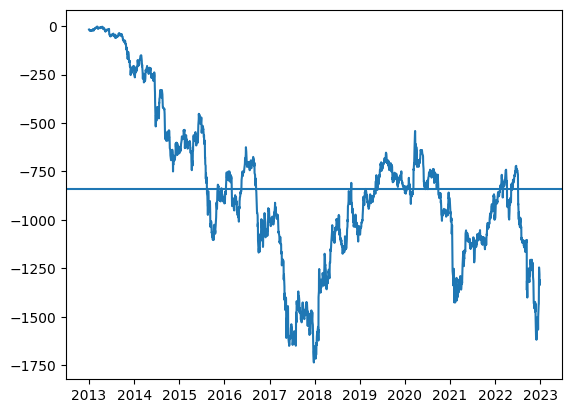

In [ ]:
plt.plot(closing_prices[pairs[0][0]]-closing_prices[pairs[0][1]])
plt.axhline((closing_prices[pairs[0][0]]-closing_prices[pairs[0][1]]).mean())

#Stratergy Execution



---



In [ ]:
window = 30

strategy = pd.DataFrame({f'closing_price_{pairs[0][0]}' : closing_prices[pairs[0][0]],
                         f'closing_price_{pairs[0][1]}' : closing_prices[pairs[0][1]]})
strategy['Spread'] = strategy[f'closing_price_{pairs[0][0]}'] - strategy[f'closing_price_{pairs[0][1]}']
strategy['Mean'] = strategy['Spread'].rolling(window=window).mean()
strategy['Std'] = strategy['Spread'].rolling(window=window).std()
strategy['Z-Score'] = (strategy['Spread'] - strategy['Mean']) / strategy['Std']

strategy

,closing_price_APOLLOTYRE.NS,closing_price_CEATLTD.NS,Spread,Mean,Std,Z-Score
Date,,,,,,
2013-01-01,89.400002,107.050003,-17.650002,NaN,NaN,NaN
2013-01-02,90.300003,109.550003,-19.250000,NaN,NaN,NaN
2013-01-03,90.050003,111.050003,-21.000000,NaN,NaN,NaN
2013-01-04,89.550003,111.150002,-21.599998,NaN,NaN,NaN
2013-01-07,88.150002,111.599998,-23.449997,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-26,320.350006,1600.900024,-1280.550018,-1486.014999,89.717620,2.290130
2022-12-27,323.500000,1660.650024,-1337.150024,-1482.033332,93.633220,1.547349
2022-12-28,321.750000,1638.400024,-1316.650024,-1477.848332,98.170812,1.642019


In [ ]:
entry_threshold = 2
exit_threshold = 0
strategy['Position'] = 0

strategy.loc[strategy['Z-Score'] > entry_threshold, 'Position'] = -1      # Short
strategy.loc[strategy['Z-Score'] < -entry_threshold, 'Position'] = 1      # Long
strategy.loc[strategy['Z-Score'].abs() < exit_threshold, 'Position'] = 0  # exit

strategy

,closing_price_APOLLOTYRE.NS,closing_price_CEATLTD.NS,Spread,Mean,Std,Z-Score,Position
Date,,,,,,,
2013-01-01,89.400002,107.050003,-17.650002,NaN,NaN,NaN,0
2013-01-02,90.300003,109.550003,-19.250000,NaN,NaN,NaN,0
2013-01-03,90.050003,111.050003,-21.000000,NaN,NaN,NaN,0
2013-01-04,89.550003,111.150002,-21.599998,NaN,NaN,NaN,0
2013-01-07,88.150002,111.599998,-23.449997,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...
2022-12-26,320.350006,1600.900024,-1280.550018,-1486.014999,89.717620,2.290130,-1
2022-12-27,323.500000,1660.650024,-1337.150024,-1482.033332,93.633220,1.547349,0
2022-12-28,321.750000,1638.400024,-1316.650024,-1477.848332,98.170812,1.642019,0


In [ ]:
pairs

In [ ]:
start = "2023-01-01"
end = "2023-12-31"
testing_data = yf.download(pairs, start=start, end=end)
closingprices = testing_data['Close']
strategy[f'closing_price_{pairs[0][0]}'] = closingprices[pairs[0][0]]
strategy[f'closing_price_{pairs[0][1]}'] = closingprices[pairs[0][1]]
strategy['Strategy_Return'] = strategy['Position'].shift(1) * (strategy[f'closing_price_{pairs[0][0]}'].pct_change() - strategy[f'closing_price_{pairs[0][1]}'].pct_change())
strategy['Cumulative_Return'] = (1 + strategy['Strategy_Return']).cumprod()

strategy

TypeError: expected string or bytes-like object